
# Project: Investigate The No-Show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a doctor appointment, receives all the instructions and is a no-show. **Why?** 

> The dataset we are using for this analysis contains information from 100k medical appointments in Brazil. A number of characteristics about the patient are included in each row.

>This investigation is centered on discovering the reasons why this might happen. 
> Are they factors that cause patients not to show up? If so what are these factors and how do they vary in patients that do show up and those that don't

>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

In [3]:
#loading data 
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#determine size of data
df.shape

(110527, 14)

In [5]:
#summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#check for duplicate data
sum(df.duplicated())

0

> As earlier stated, the data contains information for 100k pataients (110527 precisely). It has 14 features (columns) without any missing entries across all features. There are also no duplicates in the dataset

### Data Cleaning 
> Though the previous indicates that the data is not messy, the data is dirty as the quality of some features are not good enough. Let's fix that!!

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



> On inspecting the data and data types, there are no missing entries. However, some of the features are expressed in the wrong data type.

> Such features are the **patientID, Appointment ID** which should be strings

> **ScheduledDay** should be expressed in datetime 

> **AppointmentDAy** should be expressed in datetime

> **Scholarship** should be expressed as strings as it is a categorical data respresenting True or False

> **Hipertension** should be expressed as strings as it is a categorical data respresenting True or False

> **Diabetes** should be expressed as strings as it is a categorical data respresenting True or False 

> **Alcoholism** should be expressed as strings as it is a categorical data respresenting True or False   

> **Handcap** should be expressed as strings as it is a categorical data respresenting True or False 


In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [11]:
# Remove unwanted parts from strings from columns
df['ScheduledDay'] = df['ScheduledDay'].str.replace(r'[A-Za-a]+', ' ')
df['AppointmentDay'] = df['AppointmentDay'].str.replace(r'[A-Za-a]+', ' ')
df.head()

<ipython-input-11-34164d9bd946>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ScheduledDay'] = df['ScheduledDay'].str.replace(r'[A-Za-a]+', ' ')
<ipython-input-11-34164d9bd946>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['AppointmentDay'] = df['AppointmentDay'].str.replace(r'[A-Za-a]+', ' ')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# convert the ScheduledDay and AppointmentDay columns to datetime format
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [13]:
#convert to string 
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df['Scholarship'] = df['Scholarship'].astype(str)
df['Hipertension'] = df['Hipertension'].astype(str)
df['Diabetes'] = df['Diabetes'].astype(str)
df['Alcoholism'] = df['Alcoholism'].astype(str)
df['Handcap'] = df['Handcap'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  object        
 8   Hipertension    110527 non-null  object        
 9   Diabetes        110527 non-null  object        
 10  Alcoholism      110527 non-null  object        
 11  Handcap         110527 non-null  object        
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(2), obje

<a id='eda'></a>
## Exploratory Data Analysis

> Let's Explore **!!**


### Research Question 1 (what is the propotion of those that did show up to those that didn't?)

> First let's determine the number of people that do show up against those that don't. We want to know how much of the population actually don't show up

In [13]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

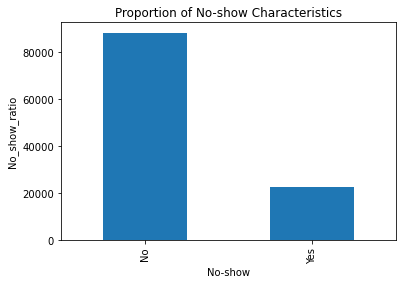

In [50]:
df['No-show'].value_counts().plot(kind='bar')
plt.xlabel('No-show')
plt.ylabel('No_show_ratio')
plt.title('Proportion of No-show Characteristics')
plt.show()

In [18]:
#percentage of people that show up 
(df['No-show'].value_counts()[0]/df.shape[0])*100

79.8067440534892

In [19]:
#percentage of people that don't show up 
(df['No-show'].value_counts()[1]/df.shape[0])*100

20.193255946510806

>> we can see that more people showed (~80%) up for their appointments

### Research Question 2 ( is there a difference in the age distribution of those who show up and those that don't?)

> What effect does age have on our patients that do and don't show up? 

> Do younger patients ahow up more that older ones? 

> Or is it the other way around?

In [20]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There are no negative ages so we need to drop minimum age -1

In [21]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [22]:
# Dropping rows with negative waiting time
df.drop(df[df['Age'] == -1].index, inplace = True)
df.describe()

,Age,SMS_received
count,110526.000000,110526.000000
mean,37.089219,0.321029
std,23.110026,0.466874
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,1.000000
max,115.000000,1.000000


In [24]:
#there no human with 0 age 
df[df['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,71844284745331.0,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175.0,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787.0,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985.0,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499.0,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956.0,5702537,F,2016-05-16 12:30:58,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577525313231.0,5777724,M,2016-06-06 14:22:34,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614245995575.0,5772400,F,2016-06-03 15:18:44,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218463343323.0,5769545,F,2016-06-03 08:56:51,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No


>> There no human with 0 as their age. A closer look shows that there 3539 observations without age we replace them with the mean age

In [26]:
df['Age'].replace(to_replace = 0, value = df['Age'].mean(), inplace=True)

In [28]:
df[df['Age'] == 0]
df.describe()

,Age,SMS_received
count,110526.000000,110526.000000
mean,38.276801,0.321029
std,22.104660,0.466874
min,1.000000,0.000000
25%,20.000000,0.000000
50%,37.089219,0.000000
75%,55.000000,1.000000
max,115.000000,1.000000


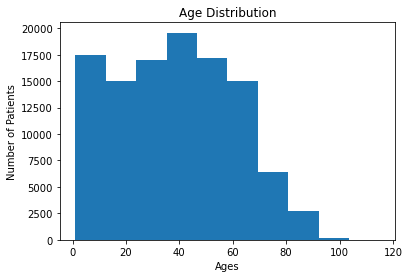

In [53]:
df['Age'].plot(kind='hist')
plt.xlabel('Ages')
plt.ylabel('Number of Patients')
plt.title('Age Distribution')
plt.show()

In [31]:
df.groupby('No-show')['Age'].mean()

No-show
No     39.009894
Yes    35.379543
Name: Age, dtype: float64

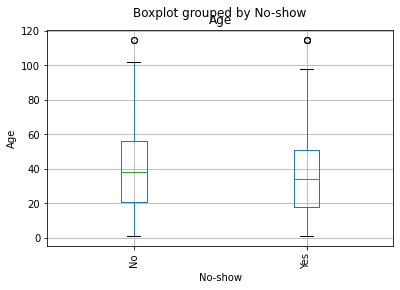

In [52]:
df.boxplot(column='Age', by='No-show', rot=90)
plt.ylabel('Age')
plt.show()

>> There is no significant difference in the age distribution of both groups. This is also evident as people are averagely in their mid 30's

### Research Question 3 (Does the family allowance(scholarship) have an effect on who shows up?)


> Scholarship here indicated the family allowance BOLSA FAMILIA given by the Brazilian government to less privileged families

> What effect does access to the family allowance have on our patients that do and don't show up? 

In [17]:
df['Scholarship'].value_counts()


0    99666
1    10861
Name: Scholarship, dtype: int64

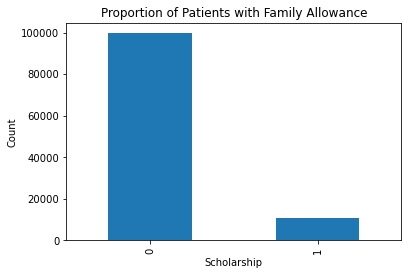

In [42]:
df['Scholarship'].value_counts().plot(kind='bar')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.title('Proportion of Patients with Family Allowance')
plt.show()

> Above 90% of the patients are not beneficiaries of the family allowance from the government. 

### Research Question 3a (what proportion of people with allowance attend their check up ?)

In [35]:
df[df['Scholarship']=='1'].groupby('No-show')['Scholarship'].count()

No-show
No     8283
Yes    2578
Name: Scholarship, dtype: int64

In [36]:
df[df['Scholarship']=='1'].groupby('No-show')['Scholarship'].count()/df[df['Scholarship']=='1'].shape[0]

No-show
No     0.762637
Yes    0.237363
Name: Scholarship, dtype: float64

> 23% of people who receive the allowance do not show up for their appointments

### Research Question 3 (what proportion of people without allowance attend their check up ?)

In [37]:
df[df['Scholarship']=='0'].groupby('No-show')['Scholarship'].count()

No-show
No     79924
Yes    19741
Name: Scholarship, dtype: int64

In [38]:
df[df['Scholarship']=='0'].groupby('No-show')['Scholarship'].count()/df[df['Scholarship']=='0'].shape[0]

No-show
No     0.801926
Yes    0.198074
Name: Scholarship, dtype: float64

> A lower percentage (19%) of people who do not receive the allowance do not show up

> Generally people without family allowance attend their appointments indicating that those with the family allowance 
probably cannot afford the bills without it

### Research Question 4 (Is the No-show character common among diabetic people?)

> What effect does being diabetic have? 

> Do diabetic patients ahow up more than non-diabetic ones? 

> Or is it the other way around?

In [39]:
df['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

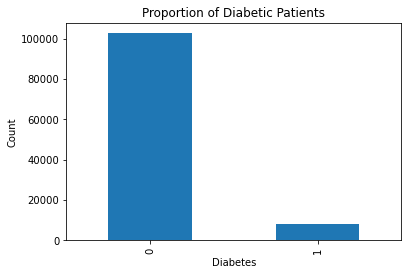

In [43]:
df['Diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Proportion of Diabetic Patients')
plt.show()

In [71]:
df.groupby('No-show')['Diabetes'].count()

No-show
No     88208
Yes    22319
Name: Diabetes, dtype: int64

In [74]:
df[df['Diabetes']=='1'].groupby('No-show')['Diabetes'].count()

No-show
No     6513
Yes    1430
Name: Diabetes, dtype: int64

In [76]:
df[df['Diabetes']=='1'].groupby('No-show')['Diabetes'].count()/df[df['Diabetes']=='1'].shape[0]

No-show
No     0.819967
Yes    0.180033
Name: Diabetes, dtype: float64

> Of the 7943 diabetic people only ~8% do not show up for their appointments. Indicating that most diabetic patients do show up to their appointments


In [96]:
# do diabetic people show up on a particular day 
# is there a common day of appoinment for diabetic people
# is there a collective scheduled day?
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointmentday,Appointmentmonth,Appointmentyear,Scheduledday,Scheduledmonth,Scheduledyear
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4,2016,4,4,2016
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4,2016,4,4,2016
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4,2016,4,4,2016
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4,2016,4,4,2016
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4,2016,4,4,2016


### Research Question 5 (Is the No-show character common among Hipertensive patients?)

> What effect does being hipertensive have? 

> Do hipertensive patients ahow up more than non-hipertensive ones? 

> Or is it the other way around?

In [45]:
df['Hipertension'].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

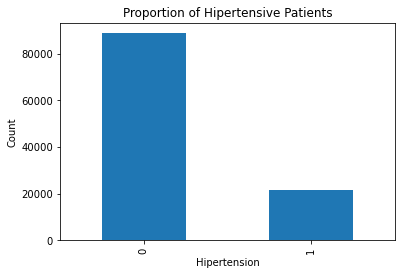

In [47]:
df['Hipertension'].value_counts().plot(kind='bar')
plt.xlabel('Hipertension')
plt.ylabel('Count')
plt.title('Proportion of Hipertensive Patients')
plt.show()

In [82]:
df.groupby('No-show')['Hipertension'].count()

No-show
No     88208
Yes    22319
Name: Hipertension, dtype: int64

In [86]:
df['Hipertension'].value_counts()/df.shape[0]

0    0.802754
1    0.197246
Name: Hipertension, dtype: float64

> 19% of all the patients are hipertensive

In [84]:
df[df['Hipertension']=='1'].groupby('No-show')['Hipertension'].count()

No-show
No     18029
Yes     3772
Name: Hipertension, dtype: int64

In [85]:
df[df['Hipertension']=='1'].groupby('No-show')['Hipertension'].count()/df[df['Hipertension']=='1'].shape[0]

No-show
No     0.82698
Yes    0.17302
Name: Hipertension, dtype: float64

> > Of the 21801 hipertensive people 17% do not show up for their appointments. Indicating that most hipertensive patients do show up to their appointments

### Research Question 5 (Is the No-show character common among Alcoholics?)

In [88]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

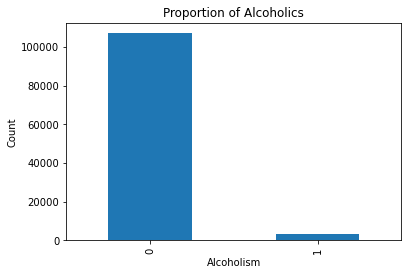

In [48]:
df['Alcoholism'].value_counts().plot(kind='bar')
plt.xlabel('Alcoholism')
plt.ylabel('Count')
plt.title('Proportion of Alcoholics')
plt.show()

In [87]:
df.groupby('No-show')['Alcoholism'].count()

No-show
No     88208
Yes    22319
Name: Alcoholism, dtype: int64

In [89]:
df['Alcoholism'].value_counts()/df.shape[0]

0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64

>  A very small amount of patients are alcoholics **(3%)**

In [90]:
df[df['Alcoholism']=='1'].groupby('No-show')['Alcoholism'].count()

No-show
No     2683
Yes     677
Name: Alcoholism, dtype: int64

In [91]:
df[df['Alcoholism']=='1'].groupby('No-show')['Alcoholism'].count()/df[df['Alcoholism']=='1'].shape[0]

No-show
No     0.798512
Yes    0.201488
Name: Alcoholism, dtype: float64

Of this small group of alcoholics **20%** do not show up for their appointments

### Research Question 5 (Is the No-show character common to a particular gender?)

In [111]:
# Gender proportion
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

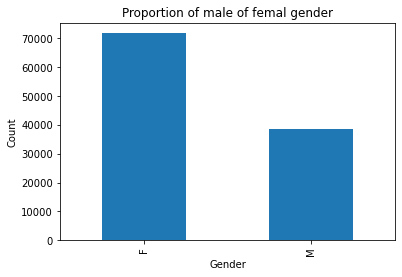

In [49]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Proportion of male of femal gender')
plt.show()

In [112]:
df['Gender'].value_counts()/df.shape[0]

F    0.649977
M    0.350023
Name: Gender, dtype: float64

> There are more Female patients as they account for ~ 65% of the entire population. Indicating that women take way more care of their health in comparison to men

In [113]:
# a closer look at the female gender
df[df['Gender']=='F'].groupby('No-show')['Gender'].count()

No-show
No     57246
Yes    14594
Name: Gender, dtype: int64

In [114]:
df[df['Gender']=='F'].groupby('No-show')['Gender'].count()/df[df['Gender']=='F'].shape[0]

No-show
No     0.796854
Yes    0.203146
Name: Gender, dtype: float64

> 80% of these women show up to their appointments

In [115]:
#a closer look at the male gender
df[df['Gender']=='M'].groupby('No-show')['Gender'].count()

No-show
No     30962
Yes     7725
Name: Gender, dtype: int64

In [116]:
df[df['Gender']=='M'].groupby('No-show')['Gender'].count()/df[df['Gender']=='M'].shape[0]

No-show
No     0.800321
Yes    0.199679
Name: Gender, dtype: float64

### Research Question 5 (Is time a determinant?)

In [124]:
# Converting the Schedule and Appointment Day feature to date type
df['Scheduleddate']=pd.to_datetime(df['ScheduledDay']).dt.date
df['Appointmentdate']=pd.to_datetime(df['AppointmentDay']).dt.date

In [125]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,No-show,Appointmentday,Appointmentmonth,Appointmentyear,Scheduledday,Scheduledmonth,Scheduledyear,Scheduleddate,Appointmentdate
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29


In [136]:
# Creating a new feature to get the difference between Appointment Day and Scheduled Day

# does this waiting period deter people from showing up to their appointments?

df['Wait_period'] = (df['Appointmentdate'] - df['Scheduleddate']).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,Appointmentday,Appointmentmonth,Appointmentyear,Scheduledday,Scheduledmonth,Scheduledyear,Scheduleddate,Appointmentdate,Wait_period
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29,0
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,No,4,4,2016,4,4,2016,2016-04-29,2016-04-29,0


In [128]:
#Checking the summary Statistics
df['Wait_period'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Wait_period, dtype: float64

the summary statistic of this new feature indicate that there are -ve values in this which will not be of help so we drop them

In [137]:
# Dropping rows with negative waiting time
df.drop(df[df['Wait_period'] < 0].index, inplace = True)

In [130]:
#Checking the summary Statistics
df['Wait_period'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Wait_period, dtype: float64

In [133]:
df.groupby('No-show')['Wait_period'].mean()

No-show
No      8.754659
Yes    15.835484
Name: Wait_period, dtype: float64

<AxesSubplot:xlabel='No-show'>

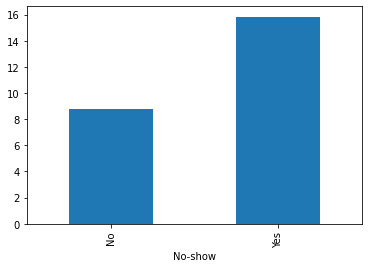

In [135]:
df.groupby('No-show')['Wait_period'].mean().plot(kind='bar')

> People that don't show up have an average of ~16 days of wait period before the appointment day, while People that showed up have an average of ~8 days of waiting before the appointment.

>Indicating that a longer wait period deter patients from showing up to appointments


<a id='conclusions'></a>
## Conclusions

The analysis was focused on determining the reasons why patients missed their scheduled appointments.
We examined 6 features including 1 engineered feature (Age, Gender, Alcolism, Diabeted, Hipertension, Time ) to deduce a conclusion on our analysis.

We considered how each feature affects this characteristics (No-show) and were able to come to the following conclusions

> * Generally more Patients (80% of the population) show up to their appointments.
> * Age does not determine if people show up to their appointments or not as there is no significant difference in the  average ages of those who showed up and those that didn't. 
> * There is a higher chance that the patient will show up if they are female as they account for 65% of the entire population and 80% of them show up to their appointments 
> * Most Diabetic and hipertensive patients show up to their appointments
> * Time (wait period) determines if patients show-up or not as people longer wait period between appointments day and scheduled day deter patients from going to their appointments

**Limitation**
> * The data only focuses on a year

**Recommendation**
> * Data for more years should be including so that a seasonality pattern could be discovered 
> * Machine learning could be used to build a classification model that can easily predict the No-show characteristics in patients




## Reference
<ul>
<li><a href="#https://www.kaggle.com/datasets/joniarroba/noshowappointments">data</a></li>
</ul>